In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('internship.csv')

In [4]:
df

,internship_title,company_name,location,start_date,duration,stipend
0,Java Development,SunbaseData,Work From Home,Immediately,6 Months,"₹ 30,000 /month"
1,Accounting and Finance,DAKSM & Co. LLP,Noida,Immediately,6 Months,"₹ 5,000-10,000 /month"
2,Sales & Digital Marketing,Bharat Natural Elements Private Limited,Bangalore,Immediately,6 Months,"₹ 5,000 /month"
3,Social Entrepreneurship,Hamari Pahchan NGO,Work From Home,Immediately,6 Months,Unpaid
4,Videography & Photography,Esquare Lifestyle,Bangalore,Immediately,6 Months,"₹ 12,000 /month"
...,...,...,...,...,...,...
6480,Project Management,Special Situation Advisors India Private Limited,Navi Mumbai,Immediately,6 Months,"₹ 7,000-10,000 /month"
6481,Dietetics/Nutrition,Special Situation Advisors India Private Limited,Navi Mumbai,Immediately,6 Months,"₹ 7,000-10,000 /month"
6482,Wealth Management,Special Situation Advisors India Private Limited,Navi Mumbai,Immediately,6 Months,"₹ 7,000-10,000 /month"
6483,Sales,Special Situation Advisors India Private Limited,Panvel,Immediately,6 Months,"₹ 7,000-10,000 /month"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   internship_title  6485 non-null   object
 1   company_name      6485 non-null   object
 2   location          6485 non-null   object
 3   start_date        6485 non-null   object
 4   duration          6485 non-null   object
 5   stipend           6485 non-null   object
dtypes: object(6)
memory usage: 304.1+ KB


In [7]:
df.isnull().sum()

,0
internship_title,0
company_name,0
location,0
start_date,0
duration,0
stipend,0


In [8]:
df.rename(columns={'internship_title':'Department'},inplace=True)

In [9]:
df.head()

,Department,company_name,location,start_date,duration,stipend
0,Java Development,SunbaseData,Work From Home,Immediately,6 Months,"₹ 30,000 /month"
1,Accounting and Finance,DAKSM & Co. LLP,Noida,Immediately,6 Months,"₹ 5,000-10,000 /month"
2,Sales & Digital Marketing,Bharat Natural Elements Private Limited,Bangalore,Immediately,6 Months,"₹ 5,000 /month"
3,Social Entrepreneurship,Hamari Pahchan NGO,Work From Home,Immediately,6 Months,Unpaid
4,Videography & Photography,Esquare Lifestyle,Bangalore,Immediately,6 Months,"₹ 12,000 /month"


In [11]:
def clean_stipend(stipend_str):
    if 'Unpaid' in stipend_str:
        return 0.0

    # Remove currency symbols, '/month', and commas
    cleaned_str = stipend_str.replace('₹', '').replace('/month', '').replace(',', '').strip()

    if '-' in cleaned_str:
        # Handle ranges like '5000-10000'
        parts = cleaned_str.split('-')
        try:
            lower = float(parts[0].strip())
            upper = float(parts[1].strip())
            return (lower + upper) / 2
        except ValueError:
            return 0.0 # Or some other default for unparseable ranges
    else:
        try:
            return float(cleaned_str)
        except ValueError:
            return 0.0 # Or some other default for unparseable single values

df['stipend_numeric'] = df['stipend'].apply(clean_stipend)

def clean_duration(duration_str):
    duration_str_lower = str(duration_str).lower() # Ensure it's a string
    if 'month' in duration_str_lower:
        try:
            # Extract the number before 'month' or 'months'
            num_part = ''.join(filter(str.isdigit, duration_str_lower.split('month')[0]))
            if num_part:
                return int(num_part)
            else:
                return 0 # If 'month' is there but no number found
        except ValueError:
            return 0 # Default if parsing fails for month-based durations
    elif 'week' in duration_str_lower:
        try:
            weeks = int(''.join(filter(str.isdigit, duration_str_lower.split('week')[0])))
            return round(weeks / 4) # Convert weeks to approximate months
        except ValueError:
            return 0
    elif 'day' in duration_str_lower:
        try:
            days = int(''.join(filter(str.isdigit, duration_str_lower.split('day')[0])))
            return round(days / 30) # Convert days to approximate months
        except ValueError:
            return 0
    elif 'immediately' in duration_str_lower or 'not specified' in duration_str_lower or 'unpaid' in duration_str_lower:
        return 0 # Represent indefinite or unspecified durations as 0 months
    else:
        try:
            # Try to directly convert if it's just a number
            return int(duration_str_lower)
        except ValueError:
            return 0 # Default for any other unparseable formats

df['duration_in_months'] = df['duration'].apply(clean_duration)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          6485 non-null   object 
 1   company_name        6485 non-null   object 
 2   location            6485 non-null   object 
 3   start_date          6485 non-null   object 
 4   duration            6485 non-null   object 
 5   stipend             6485 non-null   object 
 6   stipend_numeric     6485 non-null   float64
 7   duration_in_months  6485 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 405.4+ KB


In [12]:
df.head()

,Department,company_name,location,start_date,duration,stipend,stipend_numeric,duration_in_months
0,Java Development,SunbaseData,Work From Home,Immediately,6 Months,"₹ 30,000 /month",30000.0,6
1,Accounting and Finance,DAKSM & Co. LLP,Noida,Immediately,6 Months,"₹ 5,000-10,000 /month",7500.0,6
2,Sales & Digital Marketing,Bharat Natural Elements Private Limited,Bangalore,Immediately,6 Months,"₹ 5,000 /month",5000.0,6
3,Social Entrepreneurship,Hamari Pahchan NGO,Work From Home,Immediately,6 Months,Unpaid,0.0,6
4,Videography & Photography,Esquare Lifestyle,Bangalore,Immediately,6 Months,"₹ 12,000 /month",12000.0,6


In [13]:
# Analyze internships per department
department_counts = df['Department'].value_counts().reset_index()
department_counts.columns = ['Department', 'Internship_Count']

print("\nTop 10 Departments by Internship Count:")
print(department_counts.head(10))

# Analyze average stipend per department
department_stipend = df.groupby('Department')['stipend_numeric'].mean().reset_index()
department_stipend.columns = ['Department', 'Average_Stipend']

print("\nTop 10 Departments by Average Stipend:")
print(department_stipend.sort_values(by='Average_Stipend', ascending=False).head(10))



Top 10 Departments by Internship Count:
                         Department  Internship_Count
0      Business Development (Sales)               379
1                 Digital Marketing               362
2            Social Media Marketing               361
3                    Graphic Design               329
4              Human Resources (HR)               305
5                   Content Writing               216
6                         Marketing               138
7              Video Making/Editing                92
8  Search Engine Optimization (SEO)                81
9                             Sales                81

Top 10 Departments by Average Stipend:
                                             Department  Average_Stipend
571               Data Science (Mentor And Development)          60000.0
906                       Generative AI App Development          50000.0
221          Business Associate - Research And Analysis          35000.0
288                              

In [14]:
correlation_matrix = df[['stipend_numeric', 'duration_in_months']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    stipend_numeric  duration_in_months
stipend_numeric            1.000000           -0.009696
duration_in_months        -0.009696            1.000000


/tmp/ipython-input-2314225454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Internship_Count', y='Department', data=department_counts.head(10), palette='viridis')


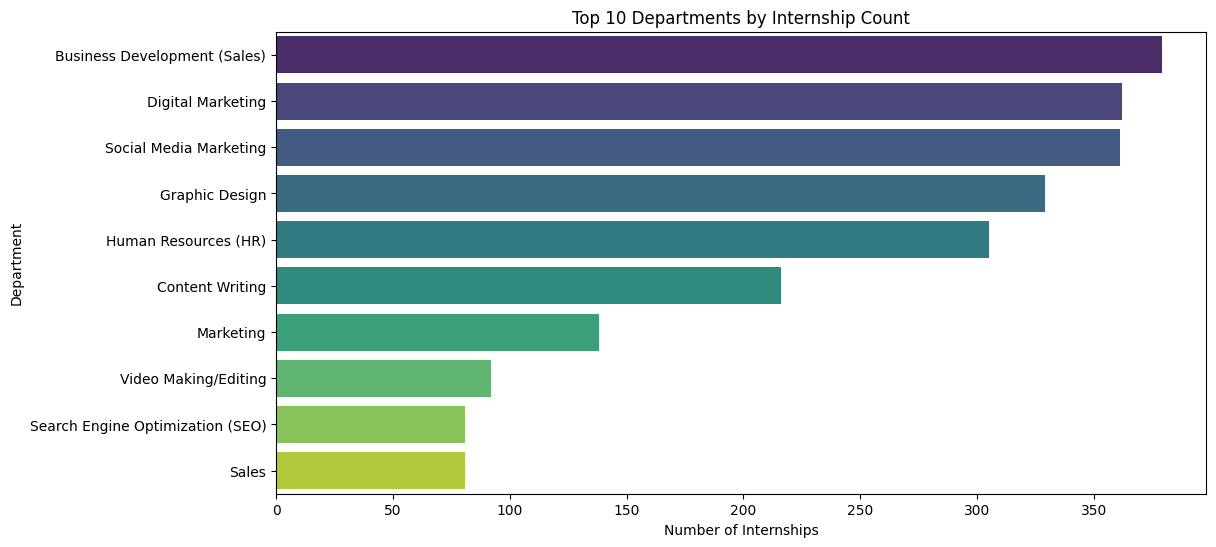

In [17]:


# Plotting Top 10 Departments by Internship Count
plt.figure(figsize=(12, 6))
sns.barplot(x='Internship_Count', y='Department', data=department_counts.head(10), palette='viridis')
plt.title('Top 10 Departments by Internship Count')
plt.xlabel('Number of Internships')
plt.ylabel('Department')
plt.show()



/tmp/ipython-input-1523843200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Stipend', y='Department', data=department_stipend.sort_values(by='Average_Stipend', ascending=False).head(10), palette='plasma')


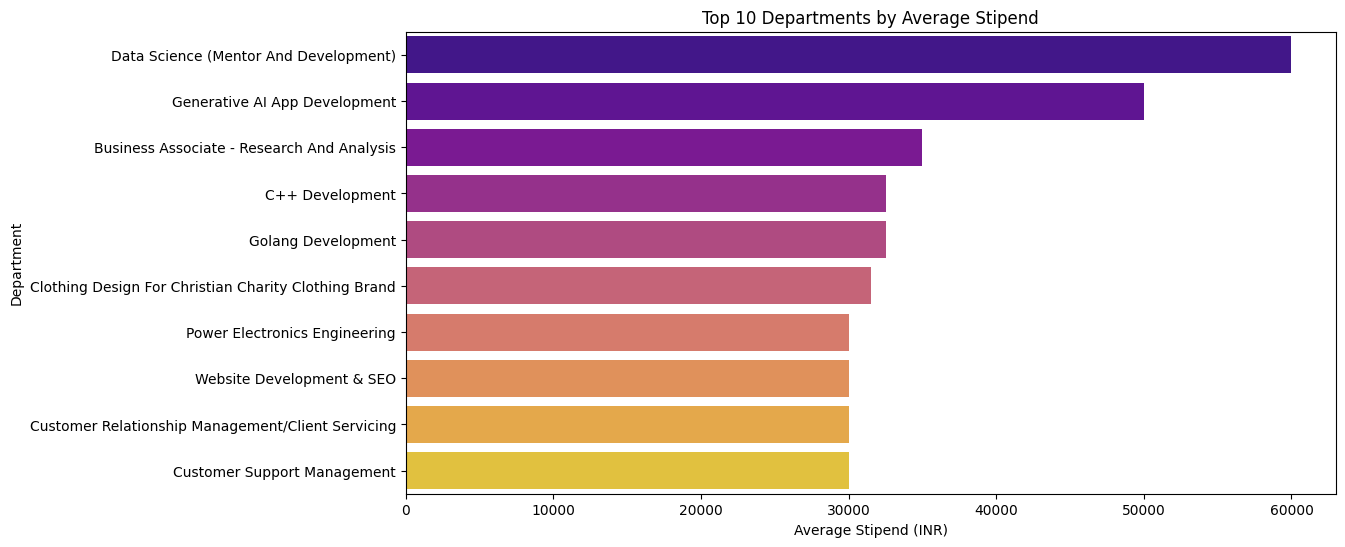

In [18]:
# Plotting Top 10 Departments by Average Stipend
plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Stipend', y='Department', data=department_stipend.sort_values(by='Average_Stipend', ascending=False).head(10), palette='plasma')
plt.title('Top 10 Departments by Average Stipend')
plt.xlabel('Average Stipend (INR)')
plt.ylabel('Department')
plt.show()

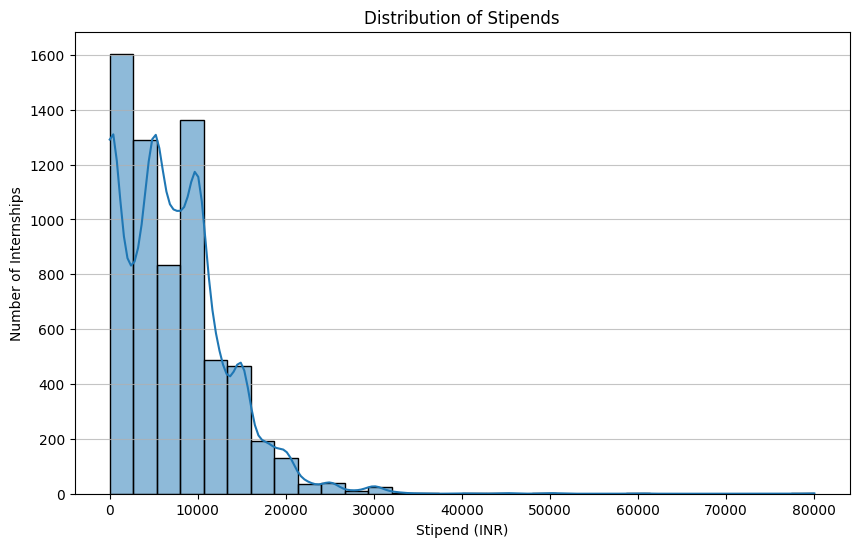

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stipend_numeric'], bins=30, kde=True)
plt.title('Distribution of Stipends')
plt.xlabel('Stipend (INR)')
plt.ylabel('Number of Internships')
plt.grid(axis='y', alpha=0.75)
plt.show()